# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

`Задача исследования` - проанализировать поведение клиентов и сделать вывод — какой тариф лучше

## Обзор данных

In [1]:
# Подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Чтение файлов
try:
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv("messages.csv")
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


**В таблице `calls` 202607 строк и 4 столбца**

**Согласно документации к данным:**
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` —  идентификатор пользователя, сделавшего звонок

In [6]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


**В таблице `internet` 149396 строк и 5 столбцов**

**Согласно документации к данным:**
* `id` —  уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Описания столбца `Unnamed: 0` - нет, судя по всему - этот столбец просто повторяет индекс строки, от него следует избавиться

In [9]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


**В таблице `messages` 123036 строк и 3 столбца**

**Согласно документации к данным:**
* `id` —   уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


**В таблице `tariffs` 2 строки и 8 столбцов**

**Согласно документации к данным:**
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `tariff_name` — название тарифа


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


**В таблице `users` 500 строк и 8 столбцов**

**Согласно документации к данным:**
* `user_id` —   уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` —   возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

### Вывод
- Перед объединением в единую таблицу, необходимо сгруппировать таблицы и добавить дополнительную информацию (месяц)
- Столбцы **call_date, session_date, message_date, churn_date, reg_date** нужно преобразовать в тип date
- В документации по таблице `internet` описания столбца **Unnamed: 0** - нет, судя по всему - этот столбец просто повторяет индекс строки, от него следует избавиться
- Надо изменить название переменной **tariff_name** на **tariff** в таблице `tariffs` для дальнейшего объединения с другими таблицами
- Следует округлить объём потраченного за сессию интернет-трафика и длительность разговора в большую сторону для дальнейшего удобства подсчета и изменения типа данных

## Предобработка данных


In [17]:
#Изменение название столбца тарифа
tariffs.rename(columns={'tariff_name':'tariff'}, inplace=True)

In [18]:
#Удаление лишнего столбца
internet.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64

In [19]:
#Обработка типов проблемных столбцов
date_format = '%Y-%m-%d'
calls['call_date'] = pd.to_datetime(calls['call_date'], format=date_format)
internet['session_date'] = pd.to_datetime(internet['session_date'], format=date_format)
messages['message_date'] = pd.to_datetime(messages['message_date'], format=date_format)
users['churn_date'] = pd.to_datetime(users['churn_date'], format=date_format)
users['reg_date'] = pd.to_datetime(users['reg_date'], format=date_format)

In [20]:
# Добавление новых столбцов 
internet['month'] = internet['session_date'].dt.month
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [21]:
# Округление длительности звонков вверх
calls['duration'] = calls['duration'].apply(np.ceil)

In [22]:
# Подсчет количества звонков для каждого пользователя по месяцам
calls_m = calls.pivot_table(index=['user_id','month'], 
                                  values='id', aggfunc=['count']).reset_index()
calls_m.columns = ['user_id', 'month', 'calls']
calls_m.head(10)

,user_id,month,calls
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58
5,1000,10,57
6,1000,11,43
7,1000,12,46
8,1001,11,59
9,1001,12,63


In [23]:
# Подсчет количества израсходованных минут разговора по месяцам
calls_m2 = calls.pivot_table(index=['user_id','month'], 
                                  values='duration', aggfunc=['sum']).reset_index()
calls_m2.columns = ['user_id', 'month', 'duration']
calls_m2.head(10)

,user_id,month,duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
5,1000,10,350.0
6,1000,11,338.0
7,1000,12,333.0
8,1001,11,430.0
9,1001,12,414.0


In [24]:
# Подсчет количества отправленных сообщений по месяцам
messages_m = messages.pivot_table(index=['user_id','month'], 
                                  values='id', aggfunc=['count']).reset_index()
messages_m.columns = ['user_id', 'month', 'messages']
messages_m.head(10)

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [25]:
# Подсчет объема израсходованного интернет-трафика по месяцам
internet_m = internet.pivot_table(index=['user_id','month'], 
                                  values='mb_used', aggfunc=['sum']).reset_index()
internet_m.columns = ['user_id', 'month', 'mb_used']
internet_m.head(10)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


In [26]:
# Определение сколько гигабайт трафика было потрачено пользователем за месяц
internet_m['gb_used'] = internet_m['mb_used'] / 1024
internet_m.head()

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,2.200674
1,1000,6,23233.77,22.689229
2,1000,7,14003.64,13.675430
3,1000,8,14055.93,13.726494
4,1000,9,14568.91,14.227451


In [27]:
# Округление значений вверх по условиям Мегалайн
#calls_m2['duration'] = calls_m2['duration'].apply(np.ceil)
internet_m['gb_used'] = internet_m['gb_used'].apply(np.ceil)

Теперь можно все объединить в единый датафрейм

In [28]:
#Объединение всех таблиц в одну общую
df = calls_m.merge(internet_m, on=['month', 'user_id'], how='outer')
df = df.merge(calls_m2, on=['month', 'user_id'], how='outer')
df = df.merge(messages_m, on=['month', 'user_id'], how='outer')
df = df.merge(users, on='user_id', how='outer')
df = df.merge(tariffs, on='tariff', how='outer')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
user_id,1000,1000,1000,1000,1000,1000,1000,1000,1003,1003
month,5,6,7,8,9,10,11,12,8,9
calls,22,43,47,52,58,57,43,46,55,134
mb_used,2253.49,23233.8,14003.6,14055.9,14568.9,14702.5,14756.5,9817.61,8565.21,12468.9
gb_used,3,23,14,14,15,15,15,10,9,13
duration,159,172,340,408,466,350,338,333,380,961
messages,22,60,75,81,57,73,58,70,37,91
age,52,52,52,52,52,52,52,52,23,23
churn_date,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
city,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Москва,Москва


In [29]:
# Общее количество пропусков
df.isna().sum()

user_id                     0
month                       2
calls                      42
mb_used                    13
gb_used                    13
duration                   42
messages                  499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [30]:
# Количество пропусков в процентах
for col in df.columns:
    pct_missing = df[col].isna().mean()
    print('{} - {}%'.format(col, round(pct_missing*100)))

user_id - 0.0%
month - 0.0%
calls - 1.0%
mb_used - 0.0%
gb_used - 0.0%
duration - 1.0%
messages - 16.0%
age - 0.0%
churn_date - 94.0%
city - 0.0%
first_name - 0.0%
last_name - 0.0%
reg_date - 0.0%
tariff - 0.0%
messages_included - 0.0%
mb_per_month_included - 0.0%
minutes_included - 0.0%
rub_monthly_fee - 0.0%
rub_per_gb - 0.0%
rub_per_message - 0.0%
rub_per_minute - 0.0%


- 2 строки с пропущенными месяцами следует удалить, так как месяц важен для дальнейшего анализа
- пропуски в duration и calls скорее всего означают, что звонки просто отсутствовали, заменим их 0
- пропуски в mb_used, gb_used тоже заменим 0
- количество пропусков в messages достаточно велико (больше 10%) - замена на медианные значения скорее всего приведет к искажению данных, тоже заменим на 0

In [31]:
# Удаление 2 строк с пропусками в month и заполнение пропусков 0
df.dropna(subset=['month'], inplace=True)
df['duration'] = df['duration'].fillna(0)
df['gb_used'] = df['gb_used'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)
df['messages'] = df['messages'].fillna(0)
df['calls'] = df['calls'].fillna(0)

Далее подсчитаем изменим типы данных и посчитаем помесячную выручку с каждого пользователя

In [32]:
# Преобразование типов данных в целочисленный
df['calls'] = df['calls'].astype(int)
df['month'] = df['month'].astype(int)
df['gb_used'] = df['gb_used'].astype(int)
df['messages'] = df['messages'].astype(int)
df['duration'] = df['duration'].astype(int)

In [33]:
# Функция подсчета ежемесячной выручки с каждого пользователя
def proceeds(row):
    if row['tariff'] == 'smart':
        messages = row['messages'] - 50
        internet = row['gb_used'] - 15
        minutes = row['duration'] - 500
        if messages > 0:
            messages = messages * 3
        else:
            messages = 0
            
        if internet > 0:
            internet = internet * 200
        else:
            internet = 0
            
        if minutes > 0:
            minutes = minutes * 3
        else:
            minutes = 0
            
        main_sum = messages + internet + minutes + 550
        return main_sum
        
    elif row['tariff'] == 'ultra':
        messages = row['messages'] - 1000
        internet = row['gb_used'] - 30
        minutes = row['duration'] - 3000
        if messages > 0:
            messages = messages * 1
        else:
            messages = 0
            
        if internet > 0:
            internet = internet * 150
        else:
            internet = 0
            
        if minutes > 0:
            minutes = minutes * 1
        else:
            minutes = 0
            
        main_sum = messages + internet + minutes + 1950
        return main_sum

In [34]:
df['proceeds'] = df.apply(proceeds, axis=1)

### Вывод 
- Избавились от различных ошибок
- Объединили таблицы 
- Избавились от значимых пропусков
- Исправили типы данных
- Округлили значения минут и гигабайт вверх
- Посчитали общую выручку по месяцам с каждого пользователя 

## Анализ данных

Необходимо ответить на вопросы:


- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитаем среднее количество, дисперсию и стандартное отклонение
- Построим гистограммы и опишем распределения

Для начала проведем сравнение тарифов

In [35]:
df1 = df.query('tariff == "smart"')
df2 = df.query('tariff == "ultra"')

In [36]:
# Количество пользователей тарифом smart
df1.shape[0]

2229

In [37]:
# Количество пользователей тарифом ultra
df2.shape[0]

985

In [38]:
# Средние затраты на тариф smart со стороны пользователя
df1['proceeds'].mean()

1289.9735307312696

In [39]:
# Средние затраты на тариф ultra со стороны пользователя
df2['proceeds'].mean()

2070.1522842639592

In [40]:
# Примерная выручка с тарифа smart в месяц
print(df1.shape[0] * df1['proceeds'].mean())

2875351.0


In [41]:
# Примерная выручка с тарифа smart в месяц
print(df2.shape[0] * df2['proceeds'].mean())

2039099.9999999998


Выручка с тарифа smart в среднем больше чем с тарифа ultra

In [42]:
df1[['messages', 'gb_used', 'duration']].describe()

,messages,gb_used,duration
count,2229.000000,2229.000000,2229.000000
mean,33.384029,16.328847,417.934948
std,28.227876,5.747061,190.313730
min,0.000000,0.000000,0.000000
25%,10.000000,13.000000,282.000000
50%,28.000000,17.000000,422.000000
75%,51.000000,20.000000,545.000000
max,143.000000,38.000000,1435.000000


In [43]:
df2[['messages', 'gb_used', 'duration']].describe()

,messages,gb_used,duration
count,985.000000,985.000000,985.000000
mean,49.363452,19.494416,526.623350
std,47.804457,9.853511,317.606098
min,0.000000,0.000000,0.000000
25%,6.000000,12.000000,284.000000
50%,38.000000,19.000000,518.000000
75%,79.000000,27.000000,752.000000
max,224.000000,49.000000,1673.000000


Вычисление несмещенных оценок для дисперсий

In [44]:
print('Дисперсия messages в тарифе smart:', np.var(df1['messages'], ddof = 1))
print('Дисперсия gb_used в тарифе smart:', np.var(df1['gb_used'], ddof = 1))
print('Дисперсия duration в тарифе smart:', np.var(df1['duration'], ddof = 1), '\n')
print('Дисперсия messages в тарифе ultra:', np.var(df2['messages'], ddof = 1))
print('Дисперсия gb_used в тарифе ultra:', np.var(df2['gb_used'], ddof = 1))
print('Дисперсия duration в тарифе ultra:', np.var(df2['duration'], ddof = 1))

Дисперсия messages в тарифе smart: 796.8129584480083
Дисперсия gb_used в тарифе smart: 33.02870517811161
Дисперсия duration в тарифе smart: 36219.31578434428 

Дисперсия messages в тарифе ultra: 2285.2661425446736
Дисперсия gb_used в тарифе ultra: 97.09168626965459
Дисперсия duration в тарифе ultra: 100873.63339730098


Вычисление несмещенных оценок для стандартных отклонений

In [45]:
print('Дисперсия messages в тарифе smart:', np.std(df1['messages'], ddof = 1))
print('Дисперсия gb_used в тарифе smart:', np.std(df1['gb_used'], ddof = 1))
print('Дисперсия duration в тарифе smart:', np.std(df1['duration'], ddof = 1), '\n')
print('Дисперсия messages в тарифе ultra:', np.std(df2['messages'], ddof = 1))
print('Дисперсия gb_used в тарифе ultra:', np.std(df2['gb_used'], ddof = 1))
print('Дисперсия duration в тарифе ultra:', np.std(df2['duration'], ddof = 1))

Дисперсия messages в тарифе smart: 28.22787555676141
Дисперсия gb_used в тарифе smart: 5.7470605685090534
Дисперсия duration в тарифе smart: 190.31372988921288 

Дисперсия messages в тарифе ultra: 47.804457350174715
Дисперсия gb_used в тарифе ultra: 9.853511367510293
Дисперсия duration в тарифе ultra: 317.6060978591264


In [46]:
df.pivot_table(index='tariff',  
                 values=['duration', 'gb_used', 'messages'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

Теперь перейдем к гистограммам

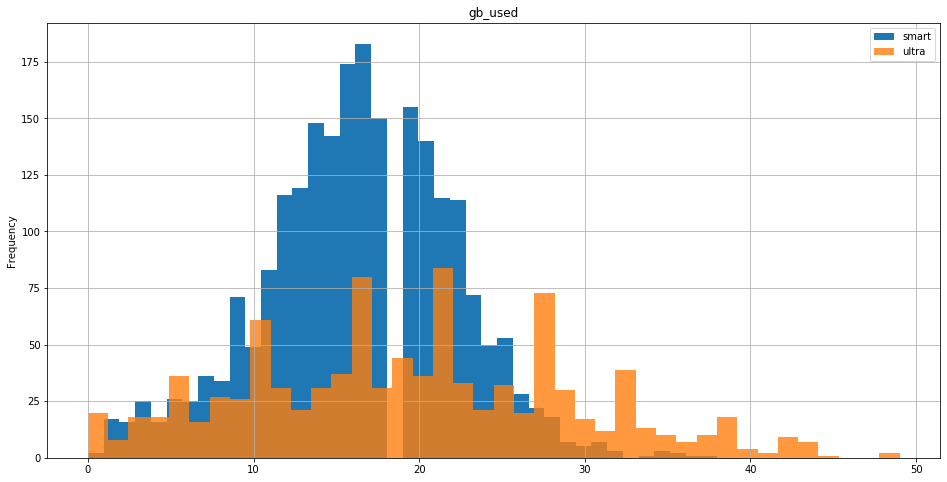

In [47]:
df1['gb_used'].plot(kind='hist', bins=40, figsize=(16,8), label='smart')
df2['gb_used'].plot(kind='hist', bins=40, grid=True, alpha=0.8, label='ultra')
plt.title("gb_used")
plt.legend()
plt.show()

In [48]:
df2['duration'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration, dtype: float64

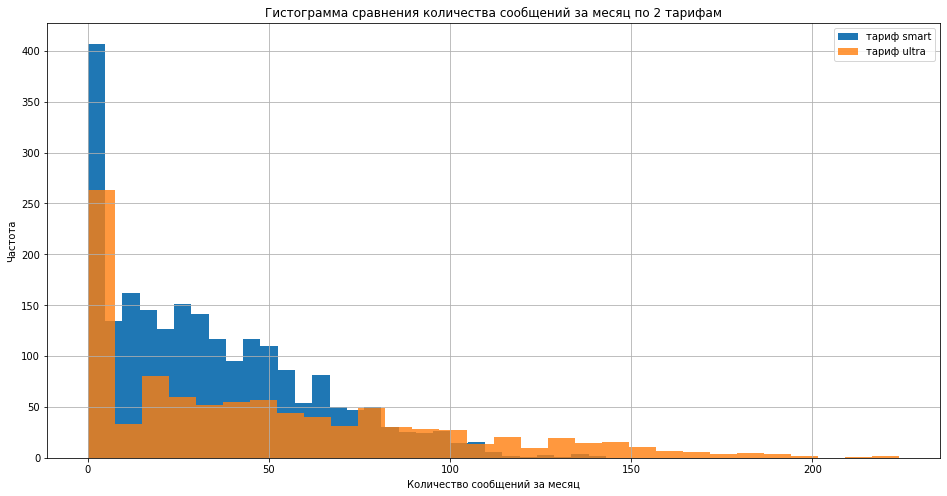

In [49]:
df1['messages'].plot(kind='hist', bins=30, figsize=(16,8), label='тариф smart')
df2['messages'].plot(kind='hist', bins=30, grid=True, alpha=0.8, label='тариф ultra')
plt.title("Гистограмма сравнения количества сообщений за месяц по 2 тарифам")
plt.xlabel('Количество сообщений за месяц')
plt.ylabel('Частота')
plt.legend()
plt.show()

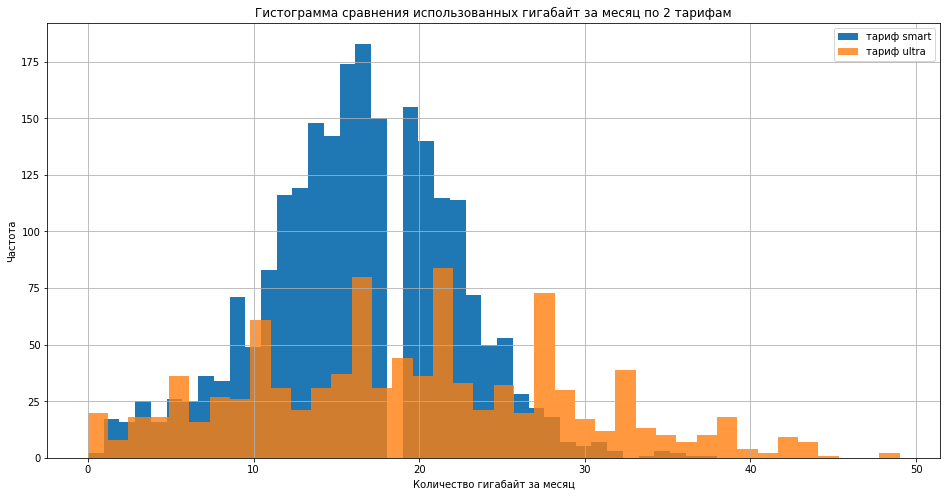

In [50]:
df1['gb_used'].plot(kind='hist', bins=40, figsize=(16,8), label='тариф smart')
df2['gb_used'].plot(kind='hist', bins=40, grid=True, alpha=0.8, label='тариф ultra')
plt.title("Гистограмма сравнения использованных гигабайт за месяц по 2 тарифам")
plt.xlabel('Количество гигабайт за месяц')
plt.ylabel('Частота')
plt.legend()
plt.show()

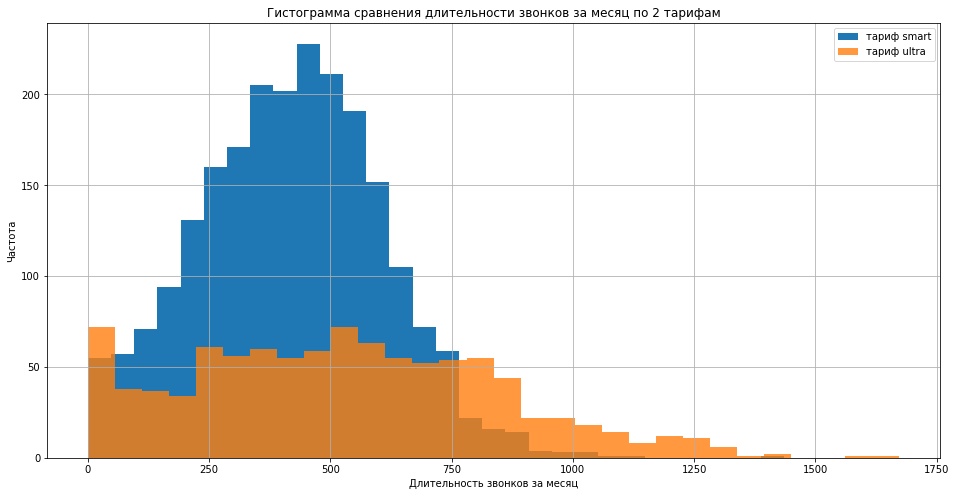

In [51]:
df1['duration'].plot(kind='hist', bins=30, figsize=(16,8), label='тариф smart')
df2['duration'].plot(kind='hist', bins=30, grid=True, alpha=0.8, label='тариф ultra')
plt.title("Гистограмма сравнения длительности звонков за месяц по 2 тарифам")
plt.xlabel('Длительность звонков за месяц')
plt.ylabel('Частота')
plt.legend()
plt.show()

Первая диаграмма показывает Пуассоновское распределение, остальные две ближе к нормальному

### Вывод
- В среднем пользователям тарифа smart требуется 34 сообщения, 17гб и 395 минут (тарифом предусмотрено 15гб трафика, но в среднем пользователям требуется на 2гб больше, следовательно выходит переплата в 400р)
- В среднем пользователям тарифа ultra требуется 50 сообщений 20гб интернета и 498 минут (тарифом предусмотрено гораздо больше трафика чем пользователи тратят)
- Посчитали средние количества, дисперсии и стандартные отклонения
- Построили гистограммы, которые проиллюстрировали Пуассоново распределение количества сообщений за месяц и нормальные распределения количества гигабайт и длительноности звонков за месяц

## Проверка гипотез


Гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


В обоих случаях мы проверям гипотезу равенства средних 2 генеральных совокупностей при этом гипотезы двусторонние


`Первая гипотеза`:


**H0** - средняя выручки пользователей тарифов «Ультра» и «Смарт» равна 


**H1** - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;


`Вторая гипотеза`:


**H0** - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;


**H1** - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Выберем стандартный уровень значимости в 5%


In [52]:
alpha = 0.05

In [53]:
# Проверка дисперсий двух выборок для корректной проверки первой гипотезы
print(np.var(df1['proceeds']))
print(np.var(df2['proceeds']))

669485.2209234245
141373.07325620347


Дисперсии сильно отличаются, учтем это при применении теста

In [54]:
# Проверка первой гипотезы
result_1 = st.ttest_ind(df1['proceeds'], df2['proceeds'], equal_var = False)

print(result_1.pvalue)

if result_1.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.2606313931076085e-250
Отклоняем нулевую гипотезу


In [55]:
# Проверка дисперсий двух выборок для корректной проверки второй гипотезы
print(np.var(df.query('city == "Москва"')['proceeds']))
print(np.var(df.query('city != "Москва"')['proceeds']))

564710.7117467273
653886.3270894174


Дисперсии в данном случае не так сильно отличаются, как в первом случае, но разница все еще ощутимая

In [56]:
result_2 = st.ttest_ind(df.query('city == "Москва"')['proceeds'], 
                       df.query('city != "Москва"')['proceeds'], equal_var = False)

print(result_2.pvalue)

if result_2.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


### Вывод
- При проверке первой гипотезы - H1 (средняя выручка пользователей тарифов «Ультра» и «Смарт» различается) не была отвергнута, скорее всего средняя выручка действительно отличается
- При проверке второй гипотезы - H1 (средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов) была отклонена, средняя выручка пользователей из Москвы не значимо отличается от выручки пользователей из других регионов



## Общий вывод

В ходе проделанной работы было выполнено:

**Предобработка данных:**
- Изменили тип данных в столбцах
- Избавились от ненужного столбца Unnamed: 0
- Округлили значения вверх в минутах разговора и гб трафика
- Заполнили пропуски
- Объединили все таблицы в одну
- Посчитали количество сделанных звонков и израсходованных минут разговоров по месяцам
- Посчитали количество отправленных сообщений по месяцам
- Посчитали объем израсходованного интернет-трафика по месяцам
- Посчитали помесячную выручку с каждого пользователя


**Анализ данных**
- Вычислили среднее, несмещенные оценки для дисперсий и стандартных отклонений
- Построили гистограммы, первая демонстрирует Пуассоново распределение, остальные две - нормальное
- Определили сколько в среднем пользователям тарифов требуется сообщений, минут и гб интернета: 
- В среднем пользователям тарифа smart требуется 34 сообщения, 17гб и 395 минут (тарифом предусмотрено 15гб трафика, но в среднем пользователям требуется на 2гб больше, следовательно выходит переплата в 400р) 
- В среднем пользователям тарифа ultra требуется 50 сообщений 20гб интернета и 498 минут (тарифом предусмотрено гораздо больше трафика чем пользователи тратят)

**Проверка гипотез**
- Отвергли гипотезу H0 (средняя выручка пользователей тарифов «Ультра» и «Смарт» равна) - средняя выручка с пользователей тарифа "Ультра" все же выше 
- H1 (средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов) тоже была отклонена, средняя выручка пользователей из Москвы не значимо отличается от выручки пользователей из других регионов

**Сравнение тарифов**


Тариф `ultra` предоставляет более широкий пакет услуг, однако пользователей тарифа `smart` больше на более чем в 2 раза

Это обусловлено тем, что пользователям не требуется так много интернет трафика, бесплатных минут и сообщений, а также высокой стоимостью тарифа

Итого, учитывая количество пользоваетелей двух тарифов и среднюю выручку с каждого пользователя, мы выяснили, что тариф `smart` приносит ощутимо большую сумму денег (около 800000р в месяц) из чего следует, что этот тариф является лучшим 